# K means/medians/modes

### (Unsupervised learning)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Steps to cluster

1. Fill NaNs.
2. Encoding categorical variables.
3. Standarize or Scaling the variables.
4. We can do a dimension reduccion. (optional)
5. Apply the clusterization method.
6. Choose the optimal number of cluster using Elbow Method or Sillhoute score.

# K means/medians/modes: Explanation

### Step 1:

Look at all the points.

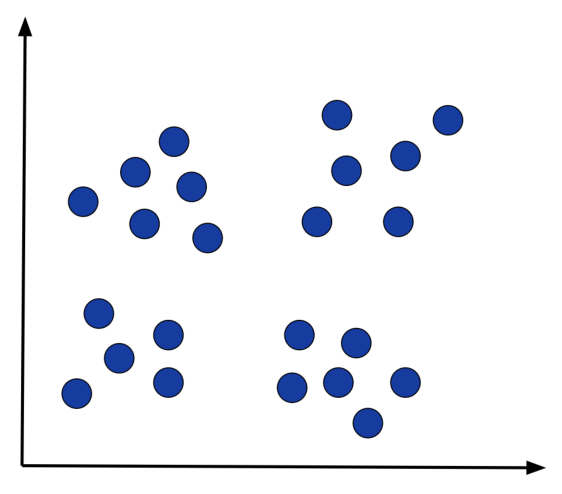

In [4]:
display_img('Step_1.png', 7, 7)

### Step 2:

Consider K = 3. Initialize randomly the first K centers.

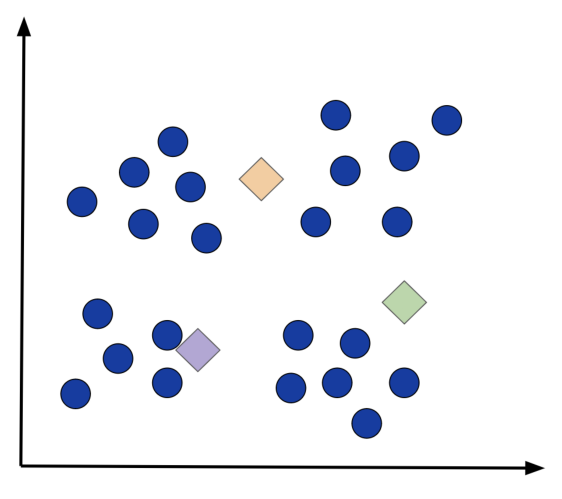

In [5]:
display_img('Step_2.png', 7, 7)

### Step 3:

For each center associated the points are closest to the centers.

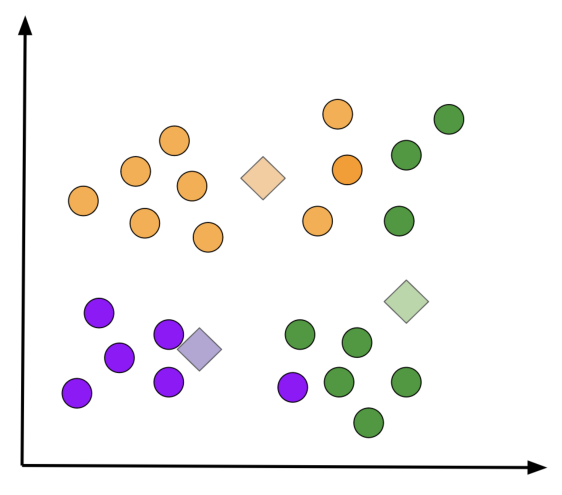

In [6]:
display_img('Step_3.png', 7, 7)

### Step 4:

Recompute the center of each cluster as the mean/median/modes of all the points.

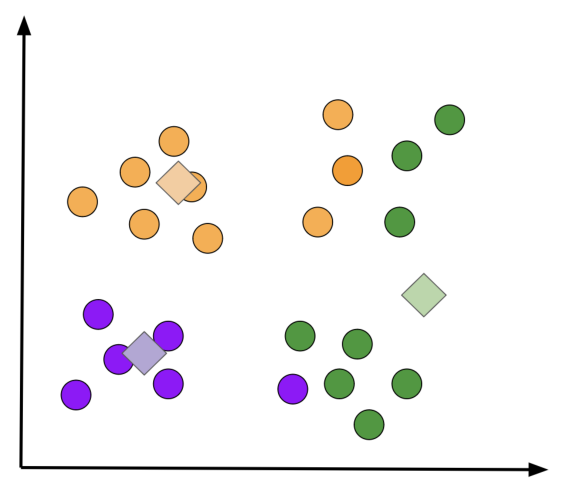

In [7]:
display_img('Step_4.png', 7, 7)

### Step 5:

Repeat the steps 3 and 4 till convergence i.e. the centers doesn't change.

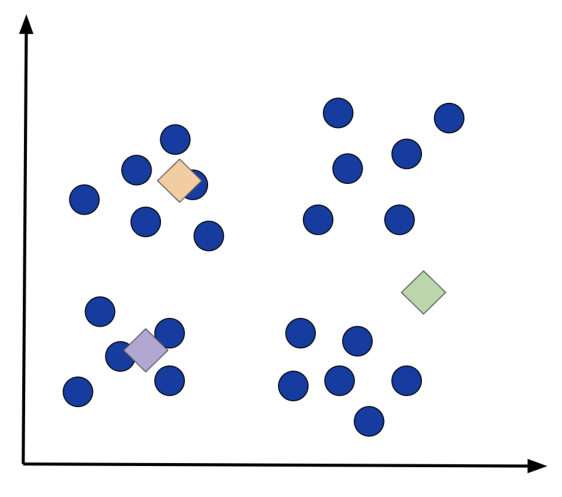

In [8]:
display_img('Step_5.png', 7, 7)

In [9]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [10]:
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t')

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### ii. Compute/Encoding features

**Age**

In [13]:
now = datetime.today().year
df['Age'] = (now - df['Year_Birth'])

In [14]:
df = df.drop(columns = ['ID', 'Year_Birth'])

**b. Education**

In [15]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
edu_values = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

In [17]:
ord_enc = OrdinalEncoder(categories = [edu_values])

In [18]:
ord_enc = ord_enc.fit(df[['Education']])

In [19]:
df['Education'] = pd.DataFrame(ord_enc.transform(df[['Education']]))[0]

In [20]:
df['Education'].value_counts()

2.0    1127
4.0     486
3.0     370
1.0     203
0.0      54
Name: Education, dtype: int64

**c. Marital Status**

In [21]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
df = df.replace({'Marital_Status': {'Single': 'Other', 'Divorced': 'Other', 'Widow': 'Other', 'Alone': 'Other', 'Absurd': 'Other', 'YOLO': 'Other'}})

In [23]:
df['Marital_Status'].value_counts()

Married     864
Other       796
Together    580
Name: Marital_Status, dtype: int64

In [24]:
mari_values = ['Other', 'Together', 'Married']

In [25]:
ord_enc = OrdinalEncoder(categories = [mari_values])

In [26]:
ord_enc = ord_enc.fit(df[['Marital_Status']])

In [27]:
df['Marital_Status'] = pd.DataFrame(ord_enc.transform(df[['Marital_Status']]))[0]

In [28]:
df['Marital_Status'].value_counts()

2.0    864
0.0    796
1.0    580
Name: Marital_Status, dtype: int64

**d. Dt Costumer**

In [29]:
now = datetime.today()

In [30]:
df['Dt_Customer'] = (now - pd.to_datetime(df['Dt_Customer'])).dt.days/365

### iii. Types Variables

In [31]:
cols_df = list(df.columns)

In [32]:
df[cols_df] = df[cols_df].astype('float')

### iv. Normalize

In [33]:
mean_df = df.mean()
std_df = df.std()

In [34]:
df = (df - mean_df)/std_df

In [35]:
del_cols = list(std_df[std_df == 0].keys())

In [36]:
del_cols

['Z_CostContact', 'Z_Revenue']

In [37]:
df = df.drop(columns = del_cols)

### v. Drop NaNs

In [38]:
df = df.dropna()

# 2. Clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
range_n_clusters = [(i + 5) for i in range(100)]

inertia = []
sil_sco = []

for n_clusters in range_n_clusters:

    model = KMeans(n_clusters = n_clusters, random_state = 0, n_init = 10).fit(df)

    inertia.append(model.inertia_)
    sil_sco.append(silhouette_score(df, model.predict(df), metric = 'euclidean'))

range_n_clusters = np.array(range_n_clusters)

inertia = np.array(inertia)
sil_sco = np.array(sil_sco)

### a. Elbow Method

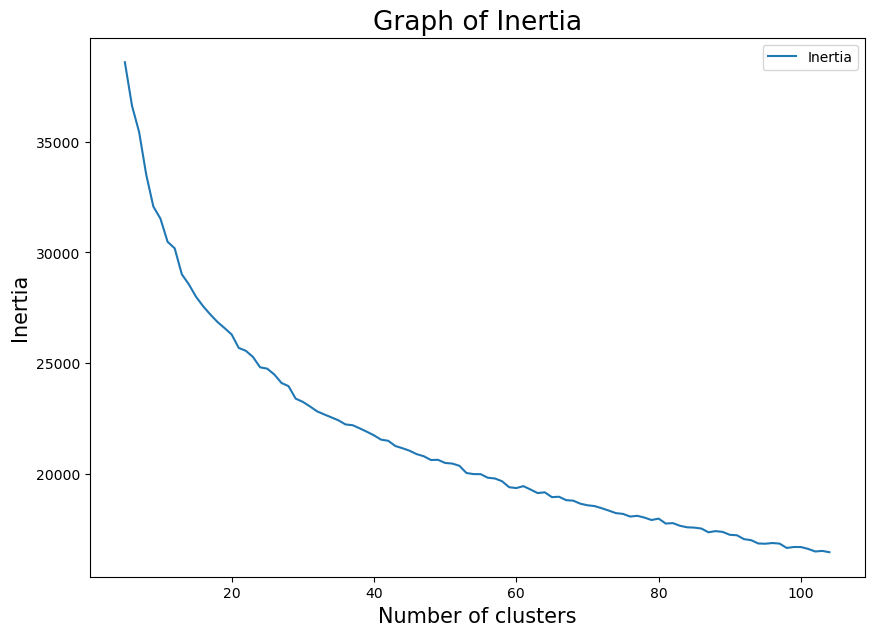

In [42]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Inertia', fontsize = 19)

plt.plot(range_n_clusters, inertia, label = 'Inertia')

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)

plt.legend()

plt.show()

### b. Silhouette Coefficient

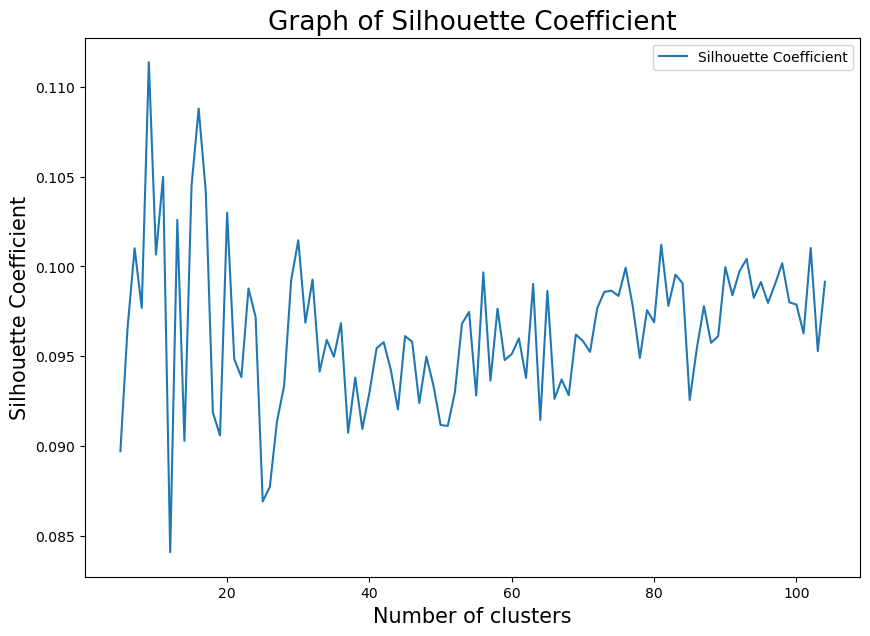

In [43]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Silhouette Coefficient', fontsize = 19)

plt.plot(range_n_clusters, sil_sco, label = 'Silhouette Coefficient')

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)

plt.legend()

plt.show()

In [44]:
K_opt_sil = range_n_clusters[sil_sco == sil_sco.max()][0]

In [45]:
K_opt_sil

9

In [46]:
round(sil_sco.max(), 4)

0.1114

**Comments:** The optimal is $K = 9$.

### c. Definitive model

In [47]:
model = KMeans(n_clusters = K_opt_sil, random_state = 0, n_init = 10).fit(df)

In [48]:
df['cluster'] = pd.Series(model.predict(df))

In [49]:
df['cluster'].value_counts()

4.0    514
2.0    463
1.0    414
3.0    397
5.0    143
0.0    116
8.0     95
7.0     30
6.0     21
Name: cluster, dtype: int64

In [50]:
centers = model.cluster_centers_

In [51]:
len(centers)

9

In [52]:
len(centers[0])

26

In [53]:
len(df.columns)

27

### Time of execution

In [54]:
end = time.time()

In [55]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 23 seconds.
